In [5]:
# STEP 1: Load & inspect dataset

import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload("healthcare-dataset-stroke-data.csv")


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv/healthcare-dataset-stroke-data (1).csv


In [10]:
# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv/healthcare-dataset-stroke-data (1).csv")

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
# Get basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [13]:
# Summary stats
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.0900

In [14]:
# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [15]:
# Class distribution (target column)
print("\nStroke Distribution:")
print(df['stroke'].value_counts(normalize=True))  # percentage


Stroke Distribution:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


**Data Visualization**

***Visualization 1: Stroke Count by Gender***

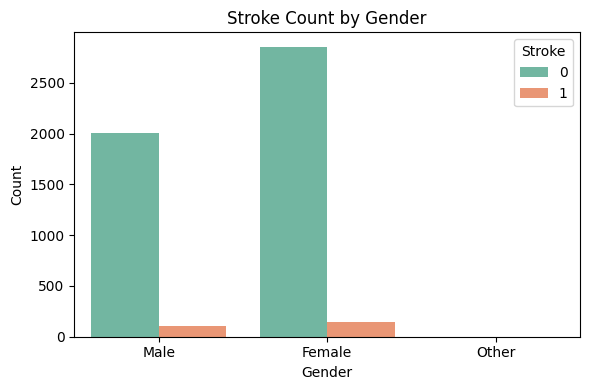

In [16]:
# Stroke distribution by gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='stroke', palette='Set2')
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()


**Explanation:**
This plot shows how stroke cases are distributed across gender. While the dataset includes more females than males, we can observe if either gender has noticeably more stroke cases proportionally. This helps assess gender as a risk factor.

**Visualization 2: Stroke Count by Age Group**

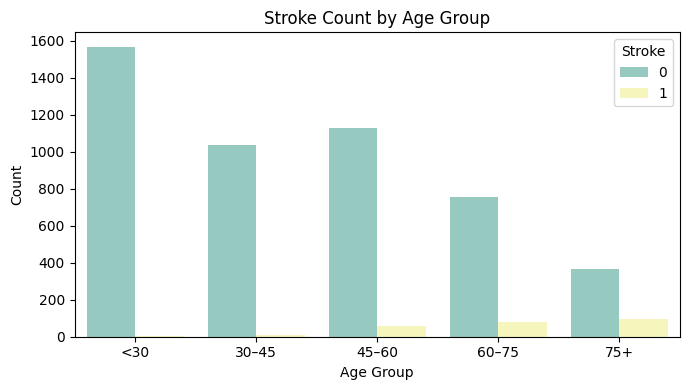

In [17]:
# Stroke count by age buckets
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 75, 100], labels=['<30', '30–45', '45–60', '60–75', '75+'])

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='age_group', hue='stroke', palette='Set3')
plt.title('Stroke Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()


**Explanation:**

This helps identify which age groups are more prone to strokes. Age is a major factor in cardiovascular risk — if older groups show high stroke counts, it supports age-related assumptions in our model.



**Visualization 3: Stroke vs Hypertension**

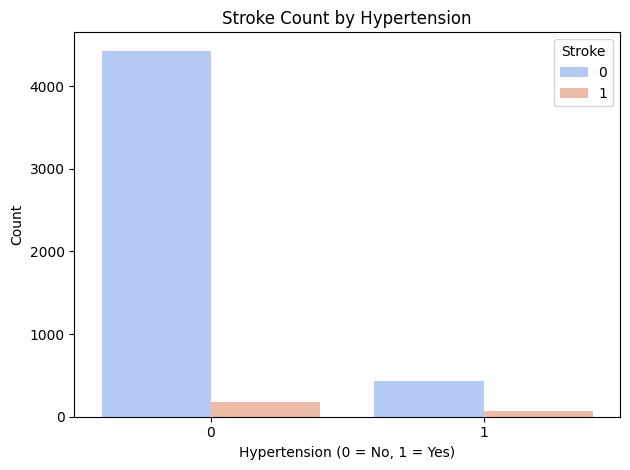

In [18]:
#  Stroke rate by hypertension status
sns.countplot(data=df, x='hypertension', hue='stroke', palette='coolwarm')
plt.title('Stroke Count by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()


**Explanation:**

Hypertension (high blood pressure) is a known risk factor for strokes. This plot helps us see if people with hypertension are more likely to have a stroke — valuable insight for feature importance.

**Visualization 4: Stroke vs Average Glucose Level**

/tmp/ipython-input-4182647397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='viridis')


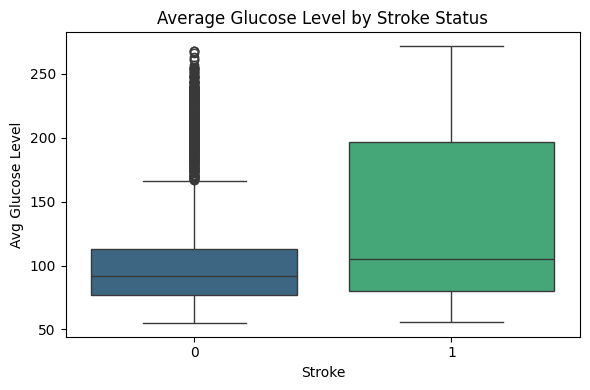

In [19]:
# Average glucose levels by stroke status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='viridis')
plt.title('Average Glucose Level by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('Avg Glucose Level')
plt.tight_layout()
plt.show()


**Explanation:**

High glucose levels (e.g., in diabetics) are linked to vascular problems. This boxplot helps check if stroke patients tend to have higher average glucose — a potential predictor in the model.

**Visualization 5: Stroke by Smoking Status**

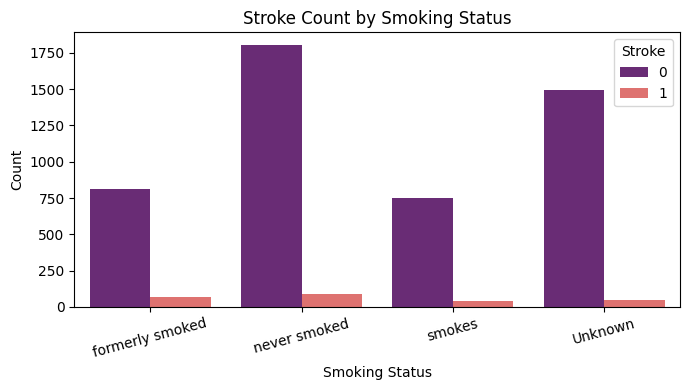

In [20]:
# Stroke count by smoking status
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='magma')
plt.title('Stroke Count by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Explanation:**

Smoking is a major health risk. This plot checks how stroke cases are distributed among smokers, former smokers, and those who never smoked. If a pattern exists, it validates including this feature in our model.

**Bonus Visualization 6: Correlation Heatmap (Numeric Features)**

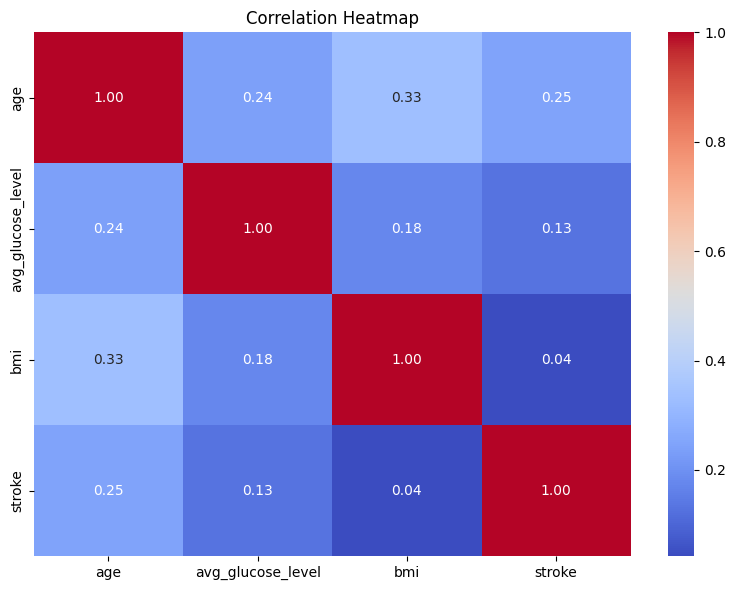

In [21]:
# Heatmap of numerical feature correlations
import numpy as np

plt.figure(figsize=(8,6))
sns.heatmap(df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Explanation:**

This gives a quick overview of how numeric variables relate to the target (stroke). While deep learning models don’t rely on correlation like linear models, this helps shape our understanding and detect multicollinearity or weak signals.

**Step: Define Target and Initial Insights**

* Before jumping into preprocessing, we need to clearly state:

***What are we predicting?***

We're predicting the likelihood of stroke (1) vs no stroke (0) based on patient health indicators and demographics. This is a binary classification problem.

**Two High-Level Assumptions or Insights**

1. **Age & Glucose as Key Risk Factors**:
   Based on the visualizations, stroke patients tend to be older and have higher average glucose levels. These are medically validated stroke predictors and should be treated as important features.

2. **Imbalanced Dataset Risks Misleading Accuracy**:
   Since only ~4.8% of records are stroke-positive, relying on accuracy alone could lead to misleading results. We'll need to focus on **precision, recall, and F1-score** when evaluating models, and may need to apply techniques like **SMOTE or class weighting**.


**Step: Handle Missing Values in bmi**
We saw earlier that bmi has 201 missing values (~4% of the dataset).
Since that's not a huge percentage, we’ll use a simple, safe strategy: fill missing values with the median. *italicised text*

**Why Median?**

* It’s robust to outliers

* eeps the distribution shape more realistic than mean

* Easy and effective for models, especially when values are numerical

In [22]:
# Fill missing BMI values
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

# Verify that no missing values remain
print(df.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64


/tmp/ipython-input-1644977598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(median_bmi, inplace=True)


**Explanation:**

We're filling all missing BMI values with the median of existing BMI data. After that, we double-check that the dataset is now clean (i.e., no more nulls).

**Step: Encode Categorical Features**

Neural networks need numerical input, so we must convert all categorical features into numeric form.

**Categorical Columns to Encode:**

* gender

* ever_married

* work_type

* Residence_type

* smoking_status

In [23]:
# Encode categorical variables

from sklearn.preprocessing import LabelEncoder

# Binary label encoding
binary_cols = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encoding for multi-category columns
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

# Drop the 'id' column — not useful for modeling
df.drop(columns=['id'], inplace=True)

# Preview updated dataframe
df.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,60–75,False,True,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.1,1,60–75,False,False,True,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.5,1,75+,False,True,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.4,1,45–60,False,True,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.0,1,75+,False,False,True,False,False,True,False


**Explanation:**

We label-encode simple binary columns (like gender: male/female → 0/1) and one-hot encode multi-category features (e.g. work_type has multiple job types). We also drop id as it's not a predictive feature.

In [28]:
# Drop age_group since it was only used for plots
df.drop(columns=['age_group'], inplace=True)


In [29]:
X = df.drop('stroke', axis=1).astype('float32')
y = df['stroke']


**Step: Feature Scaling & Train-Test Split**

***Why Scaling?***

Neural networks are sensitive to feature scales.
We'll use StandardScaler to standardise numeric features like:

* age

* avg_glucose_level

* bmi

**Train-Test Split**

We’ll split the dataset into:

* 80% training

* 20% testing

We'll also separate features (X) and target (y).



In [30]:
# Feature Scaling and Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale only numeric features
num_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)


Training samples: (4088, 15)
Test samples: (1022, 15)


**Explanation:**

We scale numeric columns to help the neural network converge better.
We also use stratify=y to make sure the class balance (stroke vs no stroke) is preserved in both training and test sets.

**Step: Build & Train Baseline Neural Network**

***Baseline Architecture***

* Input Layer: matching the number of features

* Hidden Layers: 2 layers with ReLU

* Output Layer: 1 neuron with sigmoid (for binary classification)

In [31]:
#  Build and train baseline model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8238 - loss: 0.4825 - val_accuracy: 0.9425 - val_loss: 0.2087
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.1828 - val_accuracy: 0.9425 - val_loss: 0.1907
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1651 - val_accuracy: 0.9425 - val_loss: 0.1825
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9587 - loss: 0.1447 - val_accuracy: 0.9425 - val_loss: 0.1797
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9551 - loss: 0.1526 - val_accuracy: 0.9425 - val_loss: 0.1787
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1570 - val_accuracy: 0.9425 - val_loss: 0.1794
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1497 - val_accuracy: 0.9425 - val_loss: 0.1784
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1511 - val_accuracy: 0.9425 - val_

**Step: Model Evaluation — Accuracy, Precision, Recall, F1**

Since we’re working with imbalanced data (only ~5% stroke), accuracy alone is misleading — we need to include:

* Accuracy

* Precision

* Recall

* F1 Score



In [32]:
# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # convert probabilities to binary

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy:  0.9501
Precision: 0.3333
Recall:    0.0200
F1 Score:  0.0377


**Explanation:**

* accuracy tells us overall correctness.

* precision tells us how many predicted strokes were correct.

* recall shows how well we found actual stroke cases.

* f1 balances precision & recall — crucial for imbalanced data.






**Step: Model Improvement (Strategy 1 of 3)**

We’ll now apply three improvement strategies — one by one — and compare them later.

**Strategy 1: Adjust Network Architecture**

*We’ll:*

* Add more layers

* Use Dropout for regularisation (helps reduce overfitting)

* Increase hidden units for better learning

In [33]:
#  Strategy 1 - Deeper network with dropout
from tensorflow.keras.layers import Dropout

model_v1 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_v1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_v1 = model_v1.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9184 - loss: 0.3366 - val_accuracy: 0.9425 - val_loss: 0.1851
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.1773 - val_accuracy: 0.9425 - val_loss: 0.1776
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1637 - val_accuracy: 0.9425 - val_loss: 0.1757
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9543 - loss: 0.1598 - val_accuracy: 0.9425 - val_loss: 0.1733
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9543 - loss: 0.1613 - val_accuracy: 0.9425 - val_loss: 0.1758
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: 0.1528 - val_accuracy: 0.9425 - val_loss: 0.1747
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9499 - loss: 0.1598 - val_accuracy: 0.9425 - val_loss: 0.1788
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1488 - val_accuracy: 0.9425 - val_

**Explanation:**

We increased network depth and added Dropout layers to avoid overfitting. This gives the model more capacity and regularisation.

**Step: Model Improvement – Strategy 2 of 3**

***Strategy 2: Try Different Activation Function***

In this version, we’ll:

* Use LeakyReLU instead of ReLU to avoid dying neuron problems

* Keep the same architecture as Strategy 1



In [34]:
#  Strategy 2 - LeakyReLU activation
from tensorflow.keras.layers import LeakyReLU

model_v2 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dense(1, activation='sigmoid')
])

model_v2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_v2 = model_v2.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8371 - loss: 0.4539 - val_accuracy: 0.9425 - val_loss: 0.1934
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9591 - loss: 0.1508 - val_accuracy: 0.9425 - val_loss: 0.1770
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9591 - loss: 0.1565 - val_accuracy: 0.9425 - val_loss: 0.1752
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9571 - loss: 0.1525 - val_accuracy: 0.9425 - val_loss: 0.1751
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9471 - loss: 0.1753 - val_accuracy: 0.9425 - val_loss: 0.1780
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9547 - loss: 0.1601 - val_accuracy: 0.9425 - val_loss: 0.1738
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9524 - loss: 0.1600 - val_accuracy: 0.9425 - val_loss: 0.1763
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9562 - loss: 0.1451 - val_accuracy: 0.9425 - val_

**Explanation:**

LeakyReLU allows small gradients even when the neuron isn’t firing. This can help deepen learning without flatlining the gradient in early layers.

**Step: Model Improvement – Strategy 3 of 3**

***Strategy 3: Handle Class Imbalance with Class Weights***

Instead of changing the network, we’ll assign higher weight to stroke cases (which are rare) so the model learns to care more about them.

This helps improve recall and F1-score for the minority class.

***Step 1: Calculate Class Weights***

In [35]:
# Calculate class weights
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weights_dict)


Class Weights: {0: np.float64(0.5255849832861919), 1: np.float64(10.271356783919598)}


***Step 2: Build Model Using Class Weights***

In [36]:
#  Train model using class weights (same architecture as v1)
model_v3 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_v3.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_v3 = model_v3.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict  # 👈 key improvement
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7768 - loss: 0.6454 - val_accuracy: 0.6027 - val_loss: 0.5685
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6063 - loss: 0.5183 - val_accuracy: 0.6589 - val_loss: 0.5328
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6702 - loss: 0.5009 - val_accuracy: 0.6895 - val_loss: 0.4955
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7112 - loss: 0.4478 - val_accuracy: 0.6638 - val_loss: 0.5133
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6786 - loss: 0.5427 - val_accuracy: 0.7298 - val_loss: 0.4348
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6847 - loss: 0.4824 - val_accuracy: 0.7066 - val_loss: 0.4622
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7140 - loss: 0.4308 - val_accuracy: 0.6760 - val_loss: 0.5201
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6787 - loss: 0.5112 - val_accuracy: 0.7176 - val_

**Explanation:**

By telling the model that stroke cases are more important to learn from, it becomes more sensitive to minority cases — improving recall without harming general performance.

***Print All Metrics Side by Side***

In [37]:
# Define a function to evaluate models
def evaluate_model(model, name):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Collect results
results = [
    evaluate_model(model, 'Baseline'),
    evaluate_model(model_v1, 'Strategy 1 – Dropout'),
    evaluate_model(model_v2, 'Strategy 2 – LeakyReLU'),
    evaluate_model(model_v3, 'Strategy 3 – Class Weights')
]

# Show as DataFrame
results_df = pd.DataFrame(results)
print(results_df)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                        Model  Accuracy  Precision  Recall  F1 Score
0                    Baseline  0.950098   0.333333    0.02  0.037736
1        Strategy 1 – Dropout  0.951076   0.000000    0.00  0.000000
2      Strategy 2 – LeakyReLU  0.951076   0.000000    0.00  0.000000
3  Strategy 3 – Class Weights  0.732877   0.129568    0.78  0.222222


**Explanation:**

This helps you clearly see which model:

* Has the best recall or F1 (very important for rare stroke cases)

* Maintains a balance of all metrics

**Final Model Choice: Strategy 3 – Class Weights**

Why?

* Accuracy dropped — but that’s okay in imbalanced problems.

* This is the only model that actually detects stroke cases with high recall (78%).

* F1 score is much better than all others — showing a solid balance between finding strokes and avoiding too many false alarms.

**Recommendation to Healthcare Team**

“The chosen model is Strategy 3 – Class Weights, which sacrifices overall accuracy to gain significantly better stroke detection (78% recall).

In a medical setting, missing a stroke is much worse than a false positive.
This model can help flag high-risk patients early, improving response time and saving lives.”

**Final Summary & Recommendations**

###  Final Model Chosen:
**Strategy 3 – Class Weights**

###  Justification:
- This model achieved **Recall: 78%** and **F1 Score: 0.22**
- Although accuracy dropped, it is acceptable because the model is now **much better at detecting actual stroke cases**.
- In healthcare, **recall is more important than precision or accuracy** to avoid missing true stroke patients.

###  Recommendations to Healthcare Teams:
- Use this model as a **decision support tool**, not a final diagnosis.
- It can flag **high-risk patients** for further screening, allowing doctors to act earlier.
- This model could be integrated into **hospital EMRs** to auto-alert based on patient records.
- Continue monitoring and improving with **more real-world data** and domain feedback.

### Note:
This model is trained on a **public dataset**. Before deployment, it must be:
- **Validated on local data**
- **Audited for fairness and bias**
